# 1. Read in and Visualize Raw Data

This notebook contains the workflow for the first milestone in the Manning liveProject *Handling Sensitive Data.* *Handling Sensitive Data* is part of the series *Federated Learning Over Networks for Pandemics*.

## Read data

In [1]:
import pandas as pd
import numpy as np
import os.path
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
csvpath = "../../data/" # path to csv file
wavpath = "../../data/Recordings/" # path to the folder with wav files

In [3]:
# import metadata and show sample rows
meta = pd.read_csv(csvpath + "Covid19Study_June2021.csv", delimiter=";") 
meta.sample(5)

,ParticipantID,Age,Sex,Covid19
13,14,49,f,y
136,137,22,f,y
166,167,28,f,n
183,184,49,f,y
128,129,34,f,y


In [4]:
# importing the wav files
wavdata = []

for pid in meta["ParticipantID"].values:
    if os.path.isfile(wavpath + "RecordingParticipant" + str(pid) +".wav"):
        _, data = wavfile.read(wavpath + "RecordingParticipant" + str(pid) +".wav") # note: the wav files are 16-bit integer PCM
    else:
        sample_rate = 44100
        data = np.zeros((10000,))
    wavdata.append(np.array(data))

## Histograms of "Covid19" and "Age"

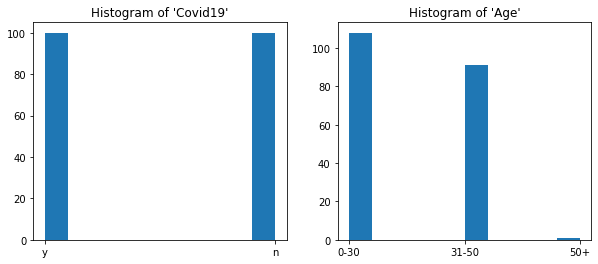

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(meta["Covid19"])
ax[0].set_title("Histogram of 'Covid19'")

ax[1].hist(pd.cut(meta["Age"], bins=[0,31,51]).astype(str))
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(["0-30","31-50","50+"])
ax[1].set_title("Histogram of 'Age'")
plt.show()

## Signal samples from participants 1-4

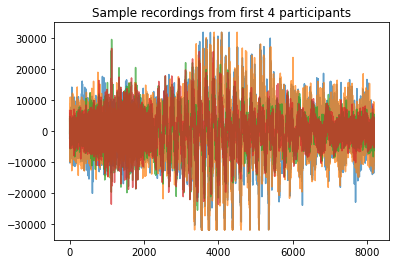

In [6]:
first4samples = [wav[-8192:] for wav in wavdata[:4]]

for s in first4samples:
    plt.plot(s,alpha=0.7)

plt.title("Sample recordings from first 4 participants")
plt.show()